# Rejection Sampling

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from progressbar import progressbar

## Target Distribution

Assume that $p(x) = \frac{f(x)}{NC}$, where $NC = \int_{- \infty}^{\infty} f(x) dx$. Let 
$$ f(x)=   \left\{
\begin{array}{ll}
      e^{\frac{1-x}{2}} + e^{-(x-1)^2} & x \geq 1 \\
      e^{\frac{x-1}{3}} + e^{(x-1)^3} & x < 1 \\
\end{array} 
\right.  $$
and $NC = 6.77921$(from wolfram alpha)
$$E[x]_{ x \sim p(x)} = \frac{E[x]_{x \sim f(x)}}{NC} = \frac{1.82783}{NC} = 0.26962$$


In [2]:
NC = 6.77921
TRUE_EXP = 0.26962

def f(x):
    if x >= 1:
        return np.exp((1-x)/2) + np.exp(-(x-1)**2)
    else:
        return np.exp((x-1)/3) + np.exp((x-1)**3)

## Draw $f(x)$ and $p(x)$

Text(0, 0.5, 'Density')

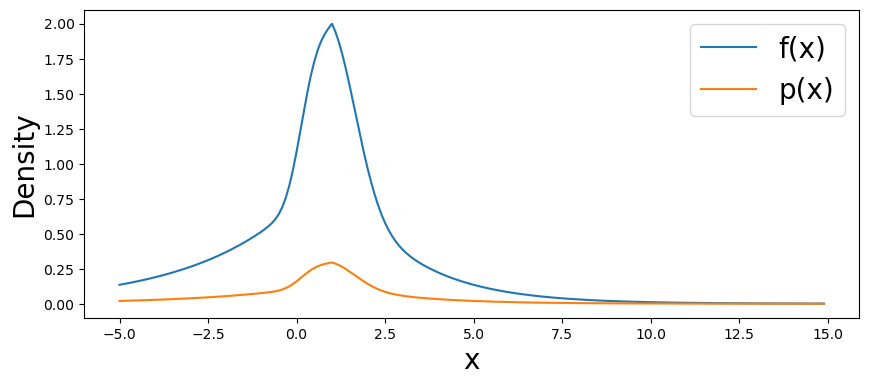

In [3]:
x_vals = np.arange(-5,15,.1)
f_vals = [f(x) for x in x_vals]
p_vals = [d/NC for d in f_vals]

plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, p_vals)
plt.legend(['f(x)', 'p(x)'], fontsize=20)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)

## $g(x) = N(1, 5)$

In [4]:
#normal PDF
def g(x, mu, sigma):
    return 1/np.sqrt(2*np.pi)/sigma * np.exp(-0.5*((x-mu)/sigma)**2)

Text(0.5, 1.0, 'M=1')

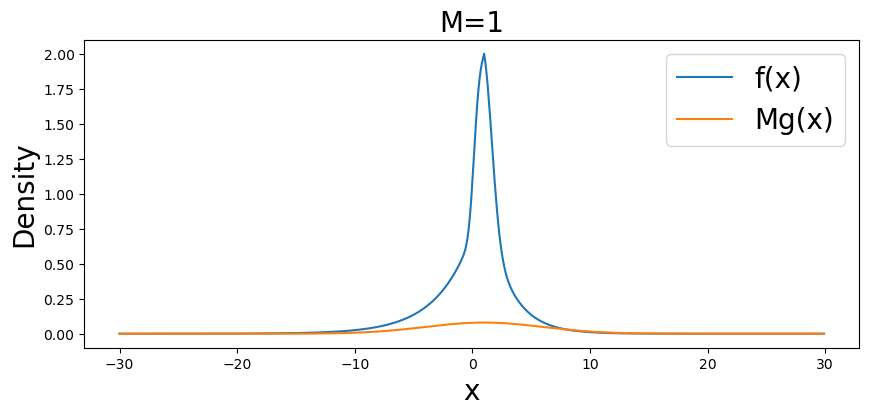

In [5]:
x_vals = np.arange(-30,30,.1)
f_vals = [f(x) for x in x_vals]
g_vals = g(x_vals, 1, 5)
M = 1

plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(['f(x)', 'Mg(x)'], fontsize=20)

plt.title(f"M={M}", fontsize=20)

Text(0.5, 1.0, 'M=75')

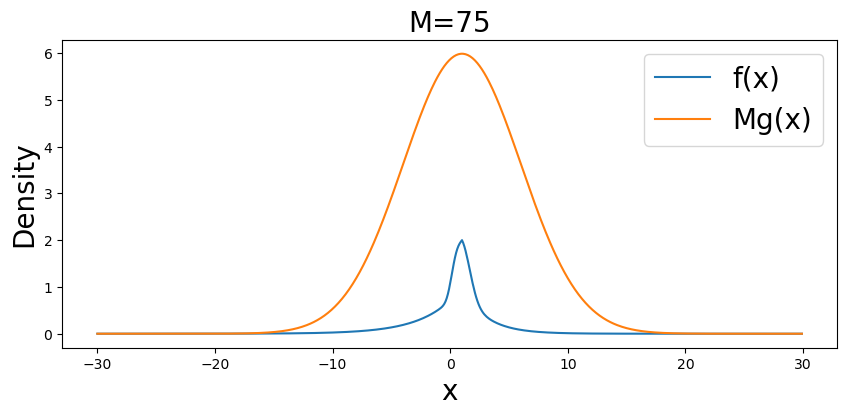

In [6]:
M = 75

plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(['f(x)', 'Mg(x)'], fontsize=20)
plt.title(f"M={M}", fontsize=20)

Text(0.5, 1.0, 'M=75')

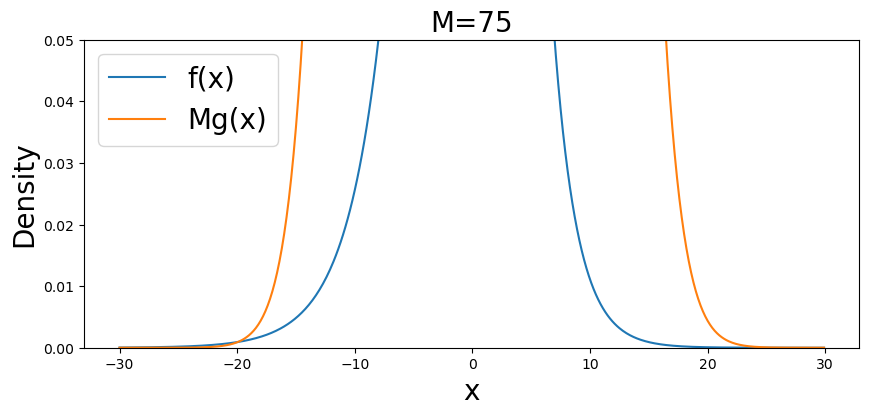

In [7]:
plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(['f(x)', 'Mg(x)'], fontsize=20)
plt.ylim(0,.05)
plt.title(f"M={M}", fontsize=20)

It's not true that $M*g(x) > f(x) \forall x$, but we will just use this

In [8]:
# sampling

samples = []
N = 1000000

for _ in progressbar( range(N) ):
    x = np.random.normal(1, 5)
    y = np.random.uniform(0, M*g(x, 1, 5))
    if y < f(x):
        samples.append(x)

100% (1000000 of 1000000) |##############| Elapsed Time: 0:00:03 Time:  0:00:03


In [9]:
print(f"{len(samples)} Samples in total")
print(f"Efficiency = {100 *len(samples)/N}%")
print(f"Sampling Mean = {np.mean(samples)}")
print(f"True Mean = {TRUE_EXP}")

90042 Samples in total
Efficiency = 9.0042%
Sampling Mean = 0.27806217512222775
True Mean = 0.26962


Text(0.5, 1.0, 'Sampling Histogram and p(x)')

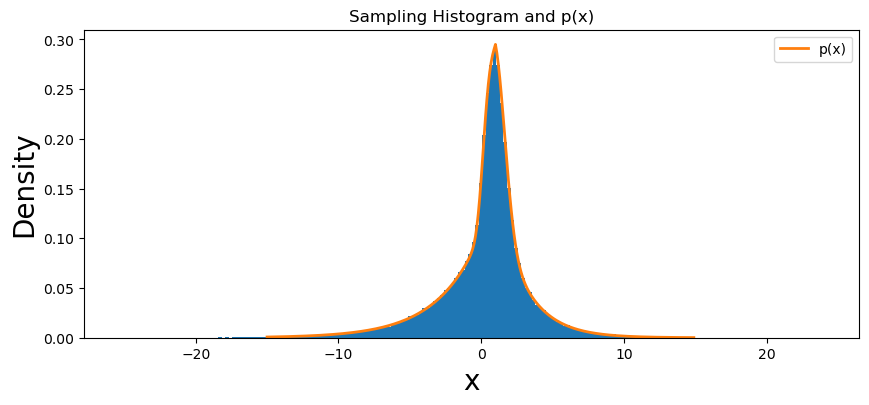

In [10]:
x_vals = np.arange(-15,15,.1)
p_vals = [f(d)/NC for d in x_vals]

plt.figure(figsize=(10,4))
plt.hist(samples, bins=200, density=True)
plt.plot(x_vals, p_vals, linewidth=2)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(["p(x)"])
plt.title("Sampling Histogram and p(x)")